# Visualization

This notebook visualizes the PCam$^{1}$ dataset, retrieved from [Kaggle](https://www.kaggle.com/c/histopathologic-cancer-detection/).

**References:**

1. B. S. Veeling, J. Linmans, J. Winkens, T. Cohen, M. Welling. "Rotation Equivariant CNNs for Digital Pathology". arXiv:1806.03962

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from torch.utils import data
from torchvision import datasets, transforms

from lib.dataset import PCam

In [2]:
# DATASET_PATH = '/content/gdrive/My Drive/CS184A/Dataset/'
DATASET_PATH = '../data'

In [3]:
# drive.mount(DATASET_PATH)

In [4]:
image_dir = os.path.join(DATASET_PATH, 'train')
csv_path = os.path.join(DATASET_PATH, 'train_labels.csv')
pcam_dataset = PCam(image_dir, csv_path, transforms.Compose([transforms.ToTensor()]))
train_loader = data.DataLoader(pcam_dataset, batch_size=4, num_workers=0)

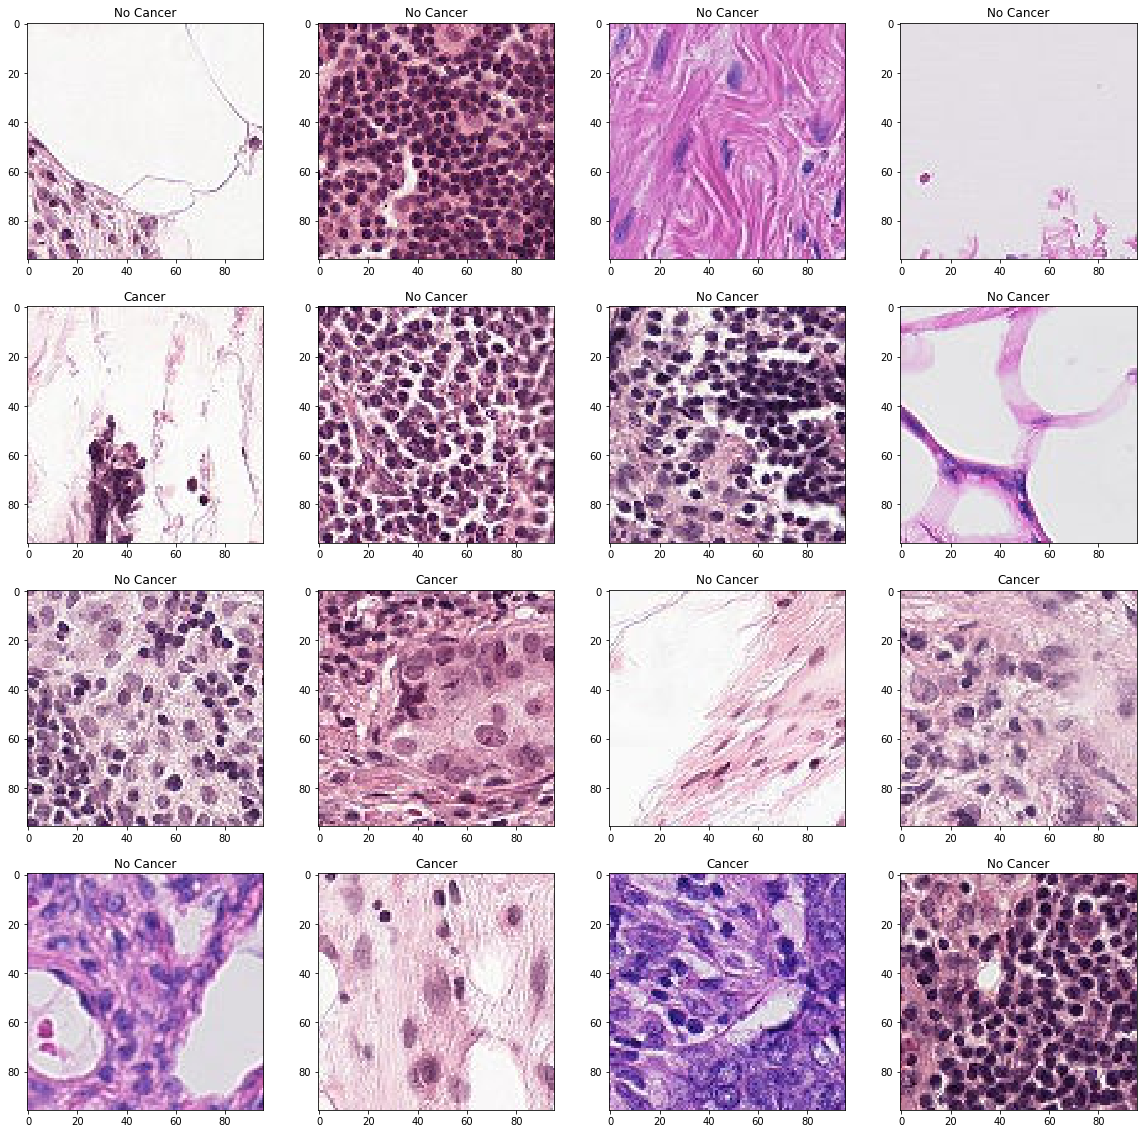

In [5]:
n_batches = 4
train_iterator = iter(train_loader)
fig, ax = plt.subplots(4, n_batches, figsize=(20, 20))
for i in range(n_batches):
    images, labels = next(train_iterator)
    for j in range(len(images)):
        I = images[j].permute(1, 2, 0)
        ax[j, i].imshow(I)
        ax[j, i].set_title('Cancer' if labels[j] == 1 else 'No Cancer')

plt.show()

In [6]:
plt.savefig('../figures/train_sample_grid16.png')

<Figure size 432x288 with 0 Axes>